# Stock Fundamental Analysis

This notebook demonstrates the usage of the modular stock analysis architecture. The architecture separates concerns into distinct modules:
1. Data retrieval
2. Financial analysis
3. Technical analysis
4. Visualization
5. AI-powered analysis
6. Report generation and export

In [23]:
# Add the project root directory to the Python path to allow importing from src
import sys
import os

# Get the current directory
current_dir = os.path.dirname(os.path.abspath('__file__'))

# Go up one level to reach the project root if needed
project_root = os.path.dirname(current_dir) if current_dir.endswith('src') else current_dir

# Add the project root to Python path if it's not already there
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"Added {project_root} to Python path")
else:
    print("Project root already in Python path")

# Show the current Python path for debugging
print(f"Current working directory: {os.getcwd()}")
print(f"Python path: {sys.path}")

Project root already in Python path
Current working directory: /Users/camiloramirezf/Documents/agent_repos/stock_fundamentals/src
Python path: ['/Users/camiloramirezf/Documents/agent_repos/stock_fundamentals', '/Users/camiloramirezf/.pyenv/versions/3.10.4/lib/python310.zip', '/Users/camiloramirezf/.pyenv/versions/3.10.4/lib/python3.10', '/Users/camiloramirezf/.pyenv/versions/3.10.4/lib/python3.10/lib-dynload', '', '/Users/camiloramirezf/Documents/agent_repos/stock_fundamentals/.venv/lib/python3.10/site-packages']


In [24]:
# Import required libraries and custom modules
import os
import pandas as pd
import numpy as np
from IPython.display import display, Markdown, Image, HTML
from datetime import datetime
import matplotlib.pyplot as plt

# Import our custom modules
from src.data import StockData
from src.financial_analysis import FinancialAnalysis
from src.technical_analysis import TechnicalAnalysis
from visualization import StockVisualization
from src.ai_analysis import AIAnalysis
from src.reporting import ReportGenerator

# To silence future warnings
import warnings
warnings.filterwarnings('ignore')

## Input Stock Symbol

Enter the stock symbol you want to analyze.

In [25]:
# Input stock symbol
stock_symbol = "BABA" # "FSLR"  # You can replace with input() to take user input
print(f"Analyzing {stock_symbol}...")

Analyzing BABA...


## 1. Data Collection

Let's gather historical price data, company information, and financial statements using our `StockData` class.

In [26]:
# Initialize StockData
stock_data = StockData(stock_symbol)

# Fetch stock data
if stock_data.fetch_stock_data(years=2):
    company_info = stock_data.get_company_info()
    print(f"Company: {company_info['company_name']}")
    print(f"Sector: {company_info['sector']}")
    print(f"Industry: {company_info['industry']}")
    print(f"Current Price: ${company_info['current_price']}")
    
    # Fetch financial statements
    stock_data.fetch_financial_statements()

Company: Alibaba Group Holding Limited
Sector: Consumer Cyclical
Industry: Internet Retail
Current Price: $112.975


In [27]:
# Calculate price trends
price_trends = stock_data.calculate_price_trends()
print("\nPrice Trends:")
print(price_trends)


Price Trends:
3-month price change: -14.90% (Change in closing price over the last 3 months)
6-month price change: 31.24% (Change in closing price over the last 6 months)
12-month price change: 51.06% (Change in closing price over the last 12 months)
All-time high: $147.57 on 2025-03-17 (Highest closing price in available data)
All-time low: $66.60 on 2024-01-18 (Lowest closing price in available data)


## 2. Financial Ratio Analysis

Calculate and visualize key financial ratios that are important for fundamental analysis.

In [28]:
# Initialize Financial Analysis
fin_analysis = FinancialAnalysis(stock_data)

# Calculate financial ratios
financial_ratios = fin_analysis.calculate_financial_ratios()

# Format and display ratios
ratios_df = fin_analysis.format_financial_ratios(financial_ratios)
print("\nKey Financial Ratios:")
display(ratios_df)


Key Financial Ratios:


,Ratio,Formatted Value
0,P/E Ratio,15.14
1,Forward P/E,11.45
2,P/B Ratio,0.26
3,P/S Ratio,0.27
4,EV/EBITDA,10.89
5,PEG Ratio,0.05
6,Gross Margin,39.95%
7,Operating Margin,12.04%
8,Net Profit Margin,13.06%
9,ROE,11.44%


In [29]:
# Get financial highlights
financial_highlights = fin_analysis.get_financial_highlights()
print("\nRecent Annual Financial Highlights (in millions USD):")
print(financial_highlights)


Recent Annual Financial Highlights (in millions USD):
Revenue: $941168.00M
Net Income: $80009.00M
EBITDA: $164011.00M
Total Assets: $1764829.00M
Total Liabilities: $652230000000.00M
Equity: $-652228235171.00M


## 3. Historical Price and Volume Analysis

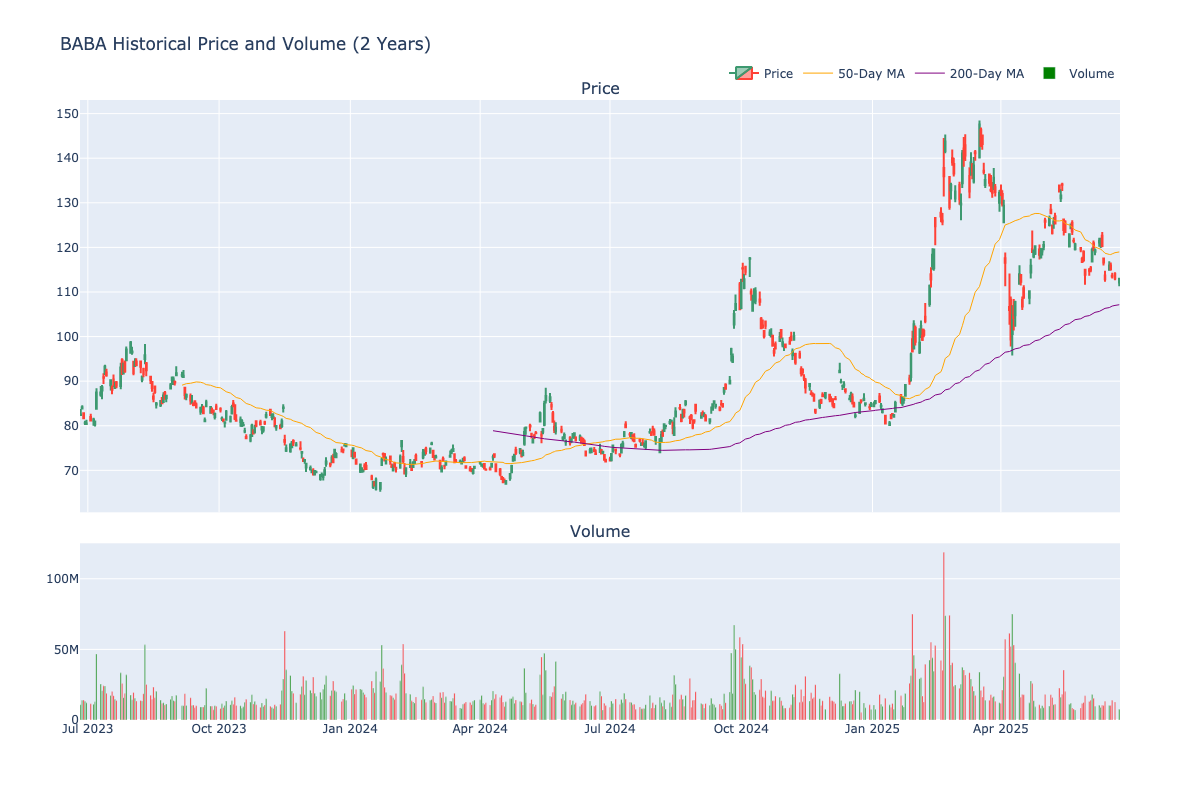

In [30]:
# Initialize Visualization
viz = StockVisualization(stock_data)

# Create price and volume chart
price_volume_chart = viz.create_price_volume_chart()

# Display the chart
viz.safe_plot_display(price_volume_chart, static=True)
# TODO: Create static display image method

## 4. Technical Analysis Indicators

In [31]:
# Initialize Technical Analysis
tech_analysis = TechnicalAnalysis(stock_data)

# Calculate technical indicators
tech_data = tech_analysis.calculate_technical_indicators()

# Get recent indicator values for later use in AI analysis
recent_indicators = tech_analysis.get_recent_indicators(tech_data)
print("Recent Technical Indicators:")
for indicator, value in recent_indicators.items():
    print(f"{indicator}: {value:.2f}")

Recent Technical Indicators:
Close: 112.97
RSI: 46.20
MACD: -2.08
MACD_Signal: -1.56
MACD_Histogram: -0.52
ATR: 2.78
BB_Upper: 123.19
BB_Middle: 117.01
BB_Lower: 110.83


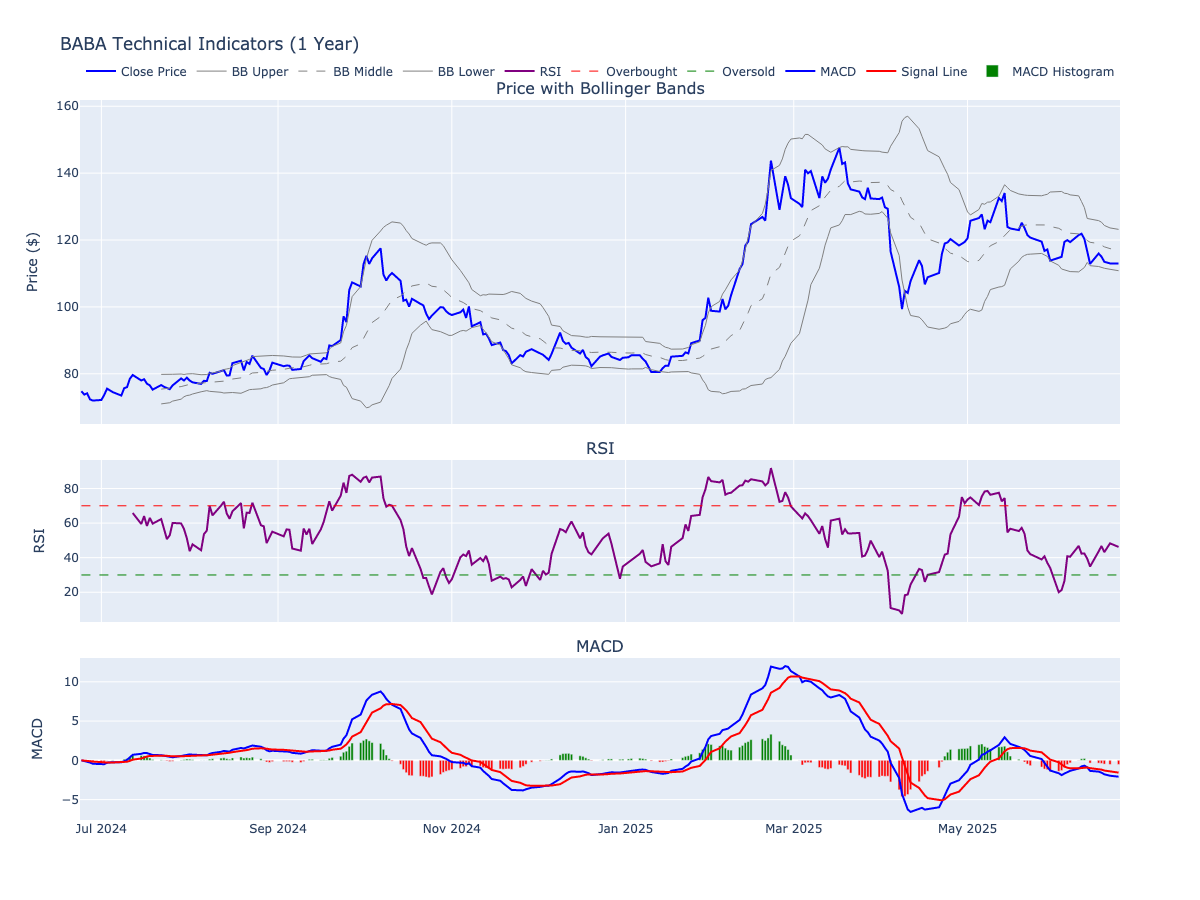

In [32]:
# Create technical analysis chart
tech_chart = viz.create_technical_chart(tech_data)

# Display the chart
viz.safe_plot_display(tech_chart)
# TODO: Create static display image method

## 5. News and Geopolitical Analysis

Let's fetch and analyze recent news about the company using OpenAI. Ensure you have an OpenAI API key stored in your environment variables or in a .env file.

In [33]:
# Initialize AI Analysis module
ai = AIAnalysis()  # Will use OPENAI_API_KEY from environment variables

OpenAI client initialized successfully.


In [34]:
# Get news analysis
company_name = company_info['company_name']
news_analysis = ai.get_news_analysis(company_name, stock_symbol, price_trends)
print(f"\nNews and Geopolitical Analysis for {company_name} ({stock_symbol}):\n")

# Display formatted news analysis
ReportGenerator.display_markdown(news_analysis)


News and Geopolitical Analysis for Alibaba Group Holding Limited (BABA):



As of June 23, 2025, Alibaba Group Holding Limited (BABA) is trading at $112.77 per share, reflecting a slight decrease of 0.21% from the previous close. Over the past three months, the stock has declined by 14.90%, while it has increased by 31.24% over the past six months and 51.06% over the past year. The all-time high for BABA shares is $147.57, reached on March 17, 2025, and the all-time low is $66.60, recorded on January 18, 2024.

**1. Recent Earnings Reports and Financial Performance**

- **Fiscal Q4 2025 Earnings (Ended March 31, 2025):**
  - **Revenue:** Reported at 236.45 billion yuan ($32.79 billion), slightly missing analysts' expectations of 237.24 billion yuan. ([reuters.com](https://www.reuters.com/technology/alibaba-misses-quarterly-revenue-estimates-2025-05-15/?utm_source=openai))
  - **Adjusted EBITDA:** Increased by 36% year-over-year to 32.6 billion yuan. ([tipranks.com](https://www.tipranks.com/stocks/baba/earnings?utm_source=openai))
  - **Non-GAAP Net Income:** Rose by 22% to 29.8 billion yuan. ([tipranks.com](https://www.tipranks.com/stocks/baba/earnings?utm_source=openai))
  - **GAAP Net Income:** Increased to 12 billion yuan, a significant rise attributed to higher income from operations and improved equity investments. ([tipranks.com](https://www.tipranks.com/stocks/baba/earnings?utm_source=openai))

- **Free Cash Flow:** Decreased by 76% to 3.7 billion yuan, primarily due to increased investments in cloud infrastructure. ([tipranks.com](https://www.tipranks.com/stocks/baba/earnings?utm_source=openai))

**2. Stock Price Development**

The stock's recent performance reflects a combination of factors:

- **Positive Drivers:**
  - Strong revenue growth in the cloud and international commerce segments.
  - Successful marketing strategies during major shopping events like Singles' Day.
  - Strategic partnerships, such as integrating Alibaba's AI solutions with Apple's iPhones in China. ([reuters.com](https://www.reuters.com/business/retail-consumer/alibaba-beats-revenue-estimates-third-quarter-2025-02-20/?utm_source=openai))

- **Negative Drivers:**
  - Missed revenue expectations in the latest earnings report. ([reuters.com](https://www.reuters.com/technology/alibaba-misses-quarterly-revenue-estimates-2025-05-15/?utm_source=openai))
  - Intensified competition in the e-commerce sector, leading to price wars and margin pressures.
  - Increased investments in AI and cloud infrastructure impacting short-term profitability.

**3. Major Business Developments**

- **Artificial Intelligence (AI) Investments:**
  - Announced plans to invest "aggressively" in AI over the next three years, aiming to develop artificial general intelligence (AGI). ([ft.com](https://www.ft.com/content/c5d1522a-5ed2-47ff-9f33-34c7823f271a?utm_source=openai))
  - Launched Qwen 3, an enhanced AI model with hybrid reasoning capabilities. ([reuters.com](https://www.reuters.com/technology/alibaba-misses-quarterly-revenue-estimates-2025-05-15/?utm_source=openai))

- **E-commerce Growth:**
  - Taobao and Tmall Group reported a nearly 9% year-over-year revenue increase, driven by new customer growth and higher order volumes. ([reuters.com](https://www.reuters.com/technology/alibaba-misses-quarterly-revenue-estimates-2025-05-15/?utm_source=openai))

- **Cloud Computing Expansion:**
  - Alibaba Cloud's revenue grew by 18% to 30.13 billion yuan, indicating strong demand for cloud services. ([reuters.com](https://www.reuters.com/technology/alibaba-misses-quarterly-revenue-estimates-2025-05-15/?utm_source=openai))

**4. Future Innovations, Partnerships, or Acquisitions**

- **Partnerships:**
  - In February 2025, partnered with Apple to integrate Alibaba's AI capabilities into Apple's iPhones for the Chinese market. ([ru.wikipedia.org](https://ru.wikipedia.org/wiki/Alibaba_Group?utm_source=openai))
  - In March 2025, collaborated with BMW to incorporate AI into next-generation vehicles. ([ru.wikipedia.org](https://ru.wikipedia.org/wiki/Alibaba_Group?utm_source=openai))

- **Acquisitions:**
  - In December 2024, sold Intime Department Store to Youngor Group, focusing on core business areas. ([en.wikipedia.org](https://en.wikipedia.org/wiki/Alibaba_Group?utm_source=openai))

**5. Leadership Changes or Organizational Restructuring**

- **Restructuring:**
  - In March 2023, announced a "1+6+N" restructuring plan, dividing the company into six independently run entities to enhance agility and innovation. ([en.wikipedia.org](https://en.wikipedia.org/wiki/Alibaba_Group?utm_source=openai))

**6. Regulatory Developments Affecting the Company**

- **Regulatory Challenges:**
  - Faced scrutiny over data privacy and antitrust issues, leading to fines and operational adjustments.
  - Ongoing compliance with Chinese government regulations impacting business operations.

**7. Macroeconomic Factors Influencing the Company and Its Industry**

- **Economic Conditions:**
  - Navigating China's economic uncertainty and global trade tensions affecting consumer spending and supply chains.
  - Fluctuations in currency exchange rates impacting international revenues.

**8. Geopolitical Events That Might Impact Operations or Supply Chains**

- **Geopolitical Tensions:**
  - Trade disputes between China and other countries potentially affecting cross-border e-commerce and logistics.
  - Regulatory changes in key markets influencing operational strategies.

**9. Competitive Landscape Changes**

- **E-commerce Competition:**
  - Facing intensified competition from JD.com and Pinduoduo, leading to aggressive pricing strategies and increased marketing expenditures. ([reuters.com](https://www.reuters.com/technology/alibaba-misses-quarterly-revenue-estimates-2025-05-15/?utm_source=openai))

- **AI and Cloud Computing:**
  - Competing with global tech giants in AI and cloud services, necessitating continuous innovation and investment.

**Conclusion**

Alibaba's recent financial performance reflects a mix of strong growth in cloud computing and e-commerce, alongside challenges from increased competition and significant investments in AI and infrastructure. Strategic partnerships and a focus on innovation position the company for future growth, though it must navigate regulatory landscapes and macroeconomic factors impacting its operations. 

## 6. Comprehensive AI-Generated Analysis Report

Now, let's generate a comprehensive report that analyzes all the data we've collected.

In [35]:
# Generate comprehensive report
print("\nGenerating comprehensive investment analysis report...\n")
comprehensive_report = ai.generate_comprehensive_report(
    stock_symbol,
    stock_data.info,
    financial_ratios,
    recent_indicators,
    news_analysis,
    price_trends=price_trends
)


Generating comprehensive investment analysis report...



In [36]:
# Display the report as formatted markdown
ReportGenerator.display_markdown(comprehensive_report)

# Investment Analysis Report for Alibaba Group Holding Limited (BABA)

## 1. Executive Summary
Alibaba Group Holding Limited (BABA) operates in the consumer cyclical sector, specifically within the internet retail industry. As of June 23, 2025, the company has a market capitalization of approximately $271.51 billion. The stock has experienced significant volatility, with a 52-week trading range of $71.80 to $148.43. Recent performance shows a 14.90% decline over the past three months, but a robust increase of 31.24% over the past six months and 51.06% year-over-year. Despite missing revenue expectations in its latest earnings report, Alibaba continues to invest heavily in AI and cloud infrastructure, positioning itself for future growth.

## 2. Fundamental Analysis
### Financial Health
- **Valuation Ratios:**
  - P/E Ratio: 15.14 (indicating a relatively low valuation compared to historical averages)
  - Forward P/E: 11.45 (suggesting potential for earnings growth)
  - P/B Ratio: 0.26 (indicating the stock is undervalued relative to its book value)
  - P/S Ratio: 0.27 (suggesting low revenue multiples)

- **Profitability Ratios:**
  - Gross Margin: 39.95%
  - Operating Margin: 12.04%
  - Net Profit Margin: 13.06%
  - ROE: 11.44% (indicating effective management of equity)

- **Liquidity Ratios:**
  - Current Ratio: 1.55 (healthy liquidity position)
  - Quick Ratio: 0.98 (slightly below 1, indicating reliance on inventory)

- **Debt Management:**
  - Debt-to-Equity: 22.78 (very low leverage)
  - Interest Coverage: N/A (not applicable due to lack of interest expenses)

### Growth Prospects
- Revenue Growth (YoY): 6.6%
- Earnings Growth (YoY): 296.4% (indicating strong recovery and profitability)

## 3. Technical Analysis
- **Current Price:** $112.97
- **Price Trends:**
  - 3-month change: -14.90%
  - 6-month change: +31.24%
  - 12-month change: +51.06%

- **Technical Indicators:**
  - RSI: 46.20 (neutral, indicating potential for upward movement)
  - MACD: -2.08 (bearish signal, but could indicate a potential reversal)
  - Bollinger Bands: Current price is near the lower band ($110.83), suggesting potential for a rebound.

## 4. News Impact Analysis
Recent news has had a mixed impact on Alibaba's prospects:
- **Positive Developments:**
  - Strong growth in cloud and international commerce segments.
  - Strategic partnerships with Apple and BMW to enhance AI capabilities.

- **Negative Developments:**
  - Missed revenue expectations in Q4 2025 earnings.
  - Increased competition leading to price wars and margin pressures.

## 5. Risk Assessment
- **Regulatory Risks:** Ongoing scrutiny over data privacy and antitrust issues could lead to fines and operational adjustments.
- **Market Competition:** Intense competition from JD.com and Pinduoduo may pressure margins and market share.
- **Macroeconomic Factors:** Economic uncertainty in China and global trade tensions could impact consumer spending.
- **Geopolitical Risks:** Trade disputes and regulatory changes in key markets may disrupt operations.

## 6. Investment Outlook
### Strengths:
- Strong growth in cloud computing and e-commerce.
- Low valuation ratios indicating potential for price appreciation.
- Strategic investments in AI and partnerships enhancing competitive position.

### Weaknesses:
- Recent earnings miss may affect investor sentiment.
- High competition in the e-commerce sector leading to pricing pressures.

### Opportunities:
- Expansion in international markets and cloud services.
- Continued investment in AI could yield significant long-term benefits.

### Threats:
- Regulatory challenges and geopolitical tensions could impact operations.
- Economic downturns affecting consumer spending.

## 7. Recommendation
**Recommendation: Buy**

### Rationale:
- **Valuation:** The stock is currently undervalued based on P/E, P/B, and P/S ratios, suggesting potential for price appreciation.
- **Growth Potential:** Strong earnings growth and strategic investments in AI and cloud computing position Alibaba well for future growth.
- **Market Position:** Despite recent challenges, Alibaba's strong market presence and innovative capabilities provide a solid foundation for recovery and expansion.

Investors should consider accumulating shares at current levels, particularly if the stock approaches the lower end of its 52-week range, as the long-term growth prospects remain robust despite short-term volatility.